In [1]:
# Importação das bibliotecas necessárias
import imutils
import cv2
from matplotlib import pyplot as plt

In [23]:
# Definindo uma função para exibição das imagens
def show_image_in_window(title, image):
    
    # Exibe a imagem captura anteriormente
    cv2.imshow(title, image)
    
    # Aperte alguma tecla para liberar o processamento
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def show_image_in_jupyter(title, image):    
    plt.figure(figsize=(8, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), aspect='auto')
    plt.title(title)
    plt.tight_layout()    

In [40]:
# Define o caminho da imagem
image_path = 'tetris_blocks.png'

#### Convertendo a imagem em escala de cinza (grayscale)

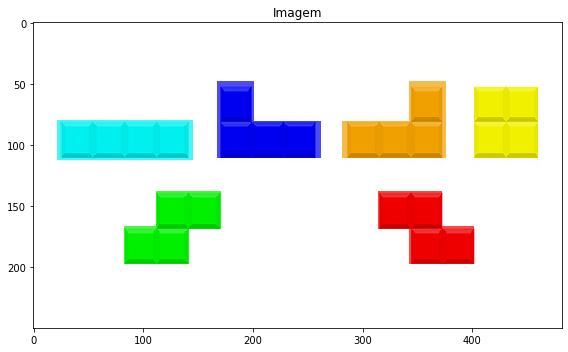

In [41]:
# Carrega a imagem e mostra o resultado
image = cv2.imread(image_path)
show_image_in_jupyter('Imagem', image)
show_image_in_window('Imagem', image)

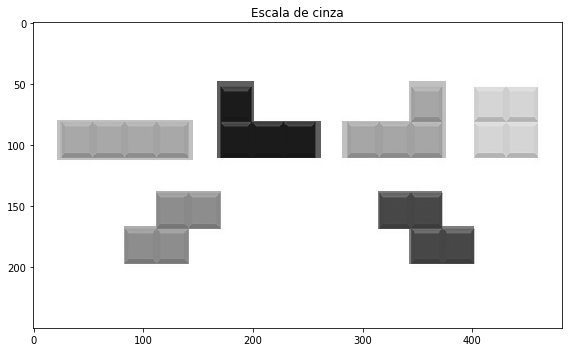

In [42]:
# Carrega a imagem e mostra o resultado
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image_in_jupyter('Escala de cinza', gray)
show_image_in_window('Escala de cinza', gray)

#### Detecção de bordas

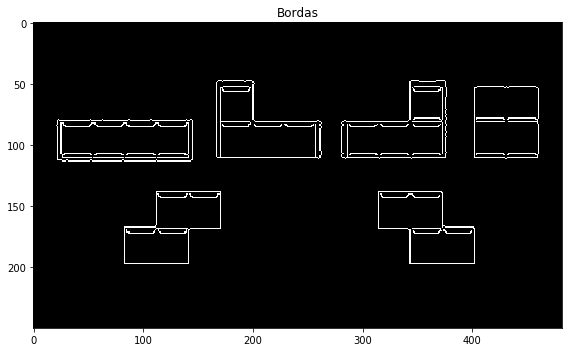

In [43]:
# Aplicando a detecção de bordas para obter os cortornos dos objetos
edged = cv2.Canny(gray, 30, 150)
show_image_in_jupyter("Bordas", edged)
show_image_in_window("Bordas", edged)

#### Limiar

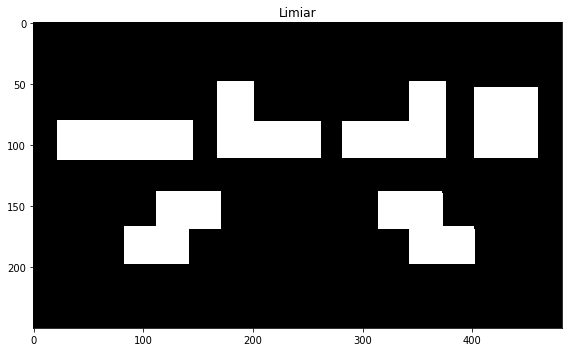

In [44]:
# Usado para remover regiões e contornos mais claros ou mais escuros
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
show_image_in_jupyter('Limiar', thresh)
show_image_in_window('Limiar', thresh)

#### Detectando ee desenhando contornos

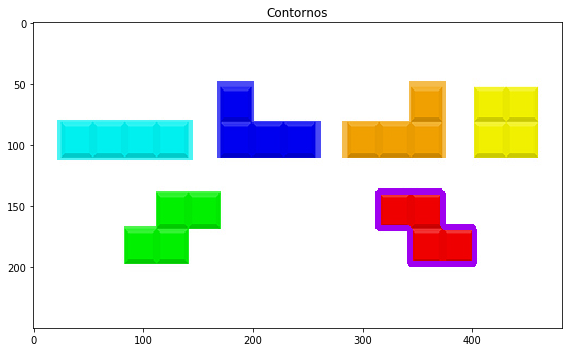

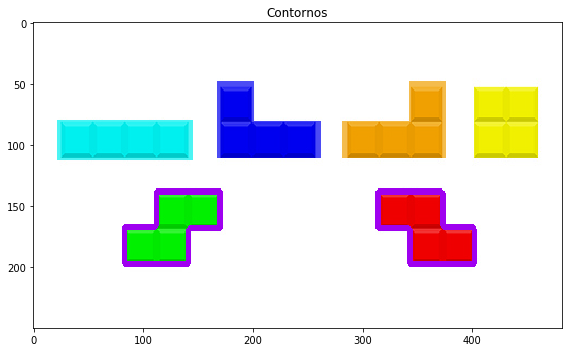

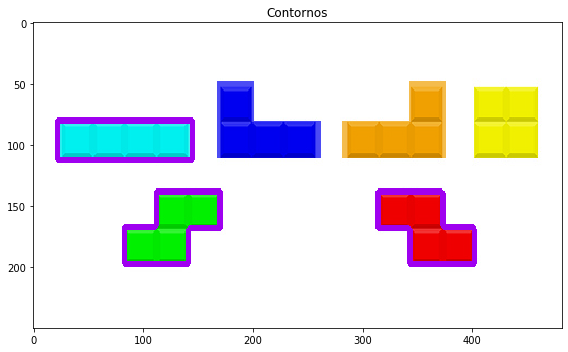

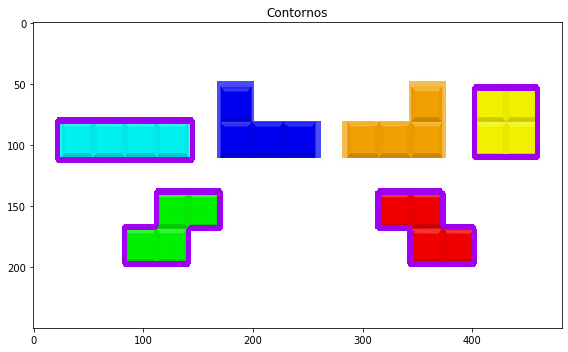

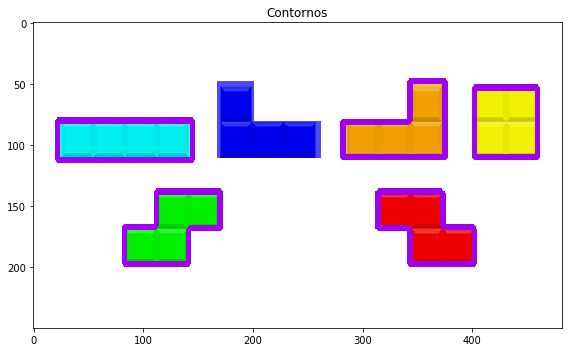

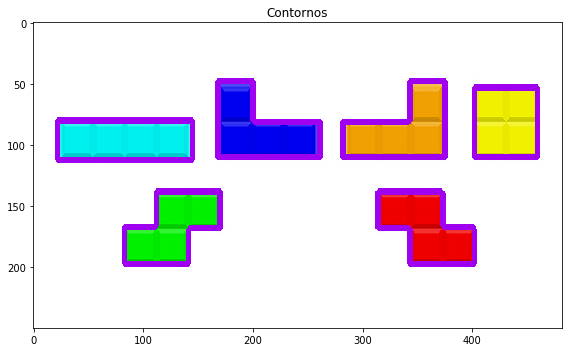

In [48]:
# Procura os contornos
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

# Itera pelos contornos encontrados
for c in cnts:
    
    # Desenha cada contorno na image 
    cv2.drawContours(output, [c], -1, (240, 0, 159), 3)    
    
    show_image_in_jupyter("Contornos", output)
    show_image_in_window("Contornos", output)

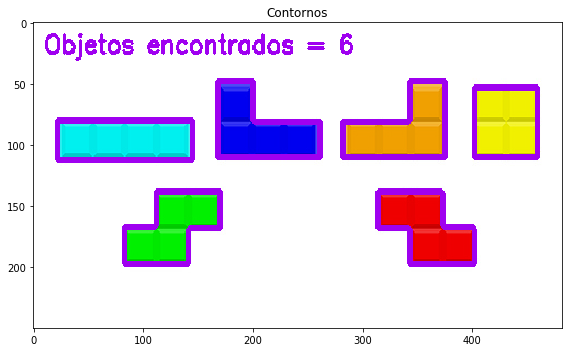

In [49]:
# Escreve na tela quando objetos foram encontrados 
text = "Objetos encontrados = {}".format(len(cnts))
cv2.putText(output, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (240, 0, 159), 2)

show_image_in_jupyter("Contagem de objetos", output)
show_image_in_window("Contagem de objetos", output)